<a href="https://colab.research.google.com/github/mrunallll/MNIST-Digit-Classfication/blob/main/MNIST_Digit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras import utils

#MNIST digit classification CNN

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()  #loading MNIST digit data

Feature Scaling
1. Make the size of x_train and x_test (rows, 28, 28, 1 channel), and scale down pixel values of x_train and y_train
2. Onehot encode y as it has labels. For eg, 3=[0,0,0,1,0,0,0,0,0,0]
4. y needs to be specifically onehot encoded becuase it is given to the 10 o/p neurons. So high value will show which neuron should give high output.

In [3]:
#Reshaping it according to the input dimension of CNN convolution layer
X_train= X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test= X_test.reshape(X_test.shape[0], 28, 28, 1)

Shape of X_test (10000, 28, 28, 1)
y[0] actual value 7


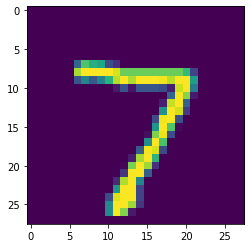

In [4]:
print("Shape of X_test", X_test.shape)
print('y[0] actual value', y_test[0])
plt.imshow(X_test[0].reshape(28, 28))

In [5]:
X_train=X_train/255.0
X_test=X_test/255.0

In [6]:
y_train=utils.to_categorical(y_train)
y_test=utils.to_categorical(y_test)

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import MaxPooling2D, Conv2D
from keras.optimizers import SGD

Make a convolutional and Pooling layer first, then flatten it.  
This flattened layer is given as input to the further dense layer, their achitechture is similar to a simple ANN

In [8]:
model=Sequential()
#adding first layer of conv+pooling
model.add(Conv2D(32, (5, 5), strides=(1, 1), padding='valid', activation='relu', input_shape= (28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Flatten())

model.add(Dense(units=100, activation='relu', kernel_initializer='normal'))    #input dim we have already mentioned in the conv layer
model.add(Dense(units=10, activation='softmax', kernel_initializer='normal'))

#setting a high momemntum can help in reaching the gloabl minima sooner
opt = SGD(learning_rate=0.01, momentum=0.95)

model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])

In [9]:
#Capturing history of model fitting
history= model.fit(X_train, y_train, batch_size=32, epochs=15, validation_data=(X_test, y_test))

Epoch 1/15
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4317 - accuracy: 0.8646 - val_loss: 0.0751 - val_accuracy: 0.9774
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0532 - accuracy: 0.9835 - val_loss: 0.0451 - val_accuracy: 0.9852
Epoch 3/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0321 - accuracy: 0.9901 - val_loss: 0.0372 - val_accuracy: 0.9879
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0211 - accuracy: 0.9929 - val_loss: 0.0397 - val_accuracy: 0.9878
Epoch 5/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0153 - accuracy: 0.9951 - val_loss: 0.0437 - val_accuracy: 0.9868
Epoch 6/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0132 - accuracy: 0.9960 - val_loss: 0.0373 - val_accuracy: 0.9894
Epoch 7/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0077 - accuracy: 0.9975 - val_loss: 0.0390 - val_accuracy:

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               460900    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 462,742
Trainable params: 462,742
Non-trainable params: 0
_________________________________________________________________


Uploading new handwritten digit and predicting output

In [12]:
import cv2
eight=cv2.imread('8.png', cv2.IMREAD_GRAYSCALE)
eight=cv2.resize(eight, (28, 28))

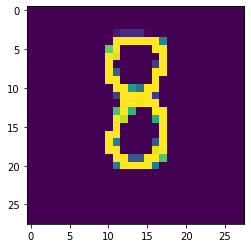

In [13]:
plt.imshow(eight)

In [14]:
model.predict(eight.reshape(1, 28, 28, 1)).argmax()   #img is the input 28x28x1 channel=1, and 1 is the number of images

8

In [25]:
X_test.shape

(10000, 28, 28, 1)

#2 digit number using extended-MNIST

In [ ]:
pip install extra-keras-datasets

In [ ]:
from extra_keras_datasets import emnist

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras import utils

In [ ]:
(x_train, y_train), (x_test, y_test) = emnist.load_data()

In [ ]:
y_train=utils.to_categorical(y_train)
y_test=utils.to_categorical(y_test)

In [ ]:
x_train=x_train/255.0
x_test=x_test/255.0

In [ ]:
x_train=x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test=x_test.reshape(x_test.shape[0], 28, 28, 1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import MaxPooling2D, Conv2D

In [ ]:
model=Sequential()
model.add(Conv2D(32, (5, 5), strides=(1, 1), padding='valid', activation='relu', input_shape= (28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Flatten())

model.add(Dense(units=50, activation='relu', kernel_initializer='normal'))    #input dim we have already mentioned in the conv layer
model.add(Dense(units=47, activation='softmax', kernel_initializer='normal'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
model.fit(x_train, y_train, batch_size=256, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
441/441 [==============================] - 44s 99ms/step - loss: 1.9049 - accuracy: 0.4899 - val_loss: 0.7550 - val_accuracy: 0.7731
Epoch 2/10
441/441 [==============================] - 44s 99ms/step - loss: 0.6788 - accuracy: 0.7902 - val_loss: 0.5866 - val_accuracy: 0.8158
Epoch 3/10
441/441 [==============================] - 44s 99ms/step - loss: 0.5326 - accuracy: 0.8286 - val_loss: 0.5290 - val_accuracy: 0.8257
Epoch 4/10
441/441 [==============================] - 44s 99ms/step - loss: 0.4747 - accuracy: 0.8430 - val_loss: 0.4976 - val_accuracy: 0.8377
Epoch 5/10
441/441 [==============================] - 44s 99ms/step - loss: 0.4456 - accuracy: 0.8504 - val_loss: 0.4867 - val_accuracy: 0.8404
Epoch 6/10
441/441 [==============================] - 43s 98ms/step - loss: 0.4216 - accuracy: 0.8574 - val_loss: 0.4699 - val_accuracy: 0.8472
Epoch 7/10
441/441 [==============================] - 43s 98ms/step - loss: 0.3982 - accuracy: 0.8625 - val_loss: 0.4595 - val_accuracy:

Predicting test set results

In [ ]:
print('0th pred', model.predict(x_test[0].reshape(1, 28, 28, 1)).argmax())
print('81st pred', model.predict(x_test[81].reshape(1, 28, 28, 1)).argmax()) 
print('69th pred', model.predict(x_test[69].reshape(1, 28, 28, 1)).argmax())
print('19th pred', model.predict(x_test[19].reshape(1, 28, 28, 1)).argmax())

0th pred 41
81st pred 17
69th pred 36
19th pred 45


In [ ]:
print('0th actual', y_test[0].argmax())
print('81th actual', y_test[81].argmax())
print('69th actual', y_test[69].argmax())
print('19th actual', y_test[19].argmax())

0th actual 41
81th actual 17
69th actual 36
19th actual 45


Predicting a customized out of data image

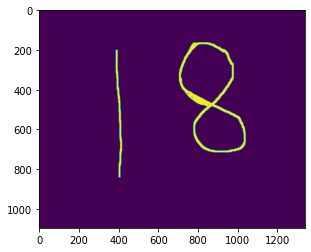

In [ ]:
import cv2
number=cv2.imread('8.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(number)

In [ ]:
number.resize(28, 28)
model.predict(number.reshape(1, 28, 28, 1)).argmax()

18

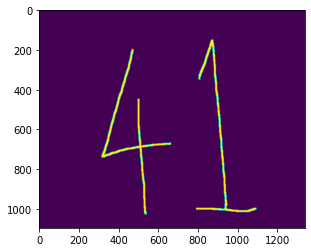

In [ ]:
number=cv2.imread('41.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(number)

In [ ]:
number.resize(28, 28)
model.predict(number.reshape(1, 28, 28, 1)).argmax()

18

In [ ]:
number.shape

(28, 28)

In [ ]:
y_train.dtype

dtype('float32')